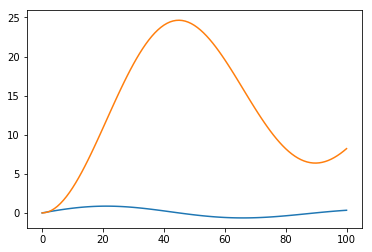

In [23]:
import numpy as np
import pylab as p

data = np.loadtxt('velocities.txt',float)
N=100
x =  data[:,0]
y = data[:,1]
dist = np.zeros(len(y))
sum = 0
for j in range(len(y)):
    sum = 0
    for i in range(1,j):
        sum += y[i]
    dist[j] = 0.5*y[j] + sum
p.plot(x,dist) 
p.show()
    
    

In [4]:
def g(x):
    return x**4-2*x+1
N=10
a= 0
b = 2
def simpson(a,b,N):
    h = (b-a)/N
    odds = 0
    evens = 0
    for i in range(1,N,2):
        odds+= g(a+i*h)
    for i in range(2,N,2):
        evens+=g(a+i*h)
    return (1/3)*h*(g(a)+g(b)+4*odds+2*evens)
simpson(a,b,N)

4.400426666666667

In [30]:
simpson(a,b,100)

4.400000042666667

In [31]:
simpson(a,b,1000)

4.400000000004267

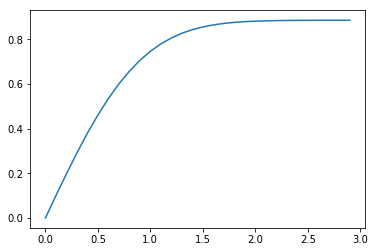

In [4]:
import numpy as np
import pylab as p
def f(x):
    return np.exp(-x**2)
N = 30
x = np.arange(0,3,0.1)
y = np.zeros(len(x))
c = 0
for i in range(1,len(x)):
    c +=simpson(x[i-1],x[i],N)
    y[i]=c
p.plot(x,y)
p.show()


11.666875123977661


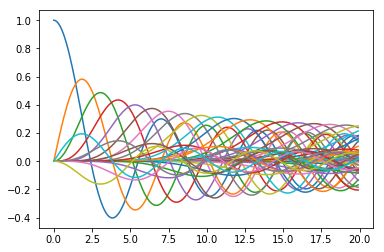

In [2]:
import numpy as np
import pylab as p
from time import time


t1 = time()

def simpson(a,b,N,m,x):
    h = (b-a)/N
    odds = 0
    evens = 0
    for i in range(1,N,2):
        odds+= t(a+i*h,m,x)
    for i in range(2,N,2):
        evens+=t(a+i*h,m,x)
    return (1/3)*h*(t(a,m,x)+t(b,m,x)+4*odds+2*evens)

def t(y,m,x):
        return (1/np.pi)*np.cos(m*y-x*np.sin(y))
    
def J(m,x):
    return simpson(0,np.pi,1000,m,x)



x = np.arange(0,20,0.1)
for i in range(1000):
    p.plot(x,J(i,x))
t2 = time()
print(t2-t1)
p.show()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


23.450265169143677


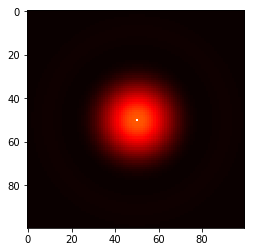

In [5]:
from time import time
t1 = time()
M=100
lam = 50
k = 2*np.pi/lam
#centro
x1 =50
x2 =50
grelha = np.zeros((M,M))
for i in range(M):
    for j in range(M):
        grelha[i][j]=( J(1,k*np.sqrt((i-x1)**2+(j-x2)**2))/(k*np.sqrt((i-x1)**2+(j-x2)**2)) )**2
t2 = time()
print(t2-t1)
p.imshow(grelha,vmax=0.5)
p.hot()
p.show()

    

In [13]:
import numpy as np
m = np.zeros((10,10))
len(m)

10

In [59]:


def f(x):
    return np.sin(np.sqrt(100*x))**2    # função integrada

M=7
N=2                                     # parâmetros 
a=0
b = 1
h = (b-a)/N
grelha = np.zeros((M,M))
sum = 0
for i in range(1,N):                       # cálculo da primeira entrada da matriz,
    sum += f(a+i*h)                        # usando a regra do trapézio 
grelha[0][0] = h*(0.5*f(a)+0.5*f(b)+ sum)

def recurso(matriz,i,j,N0,a,b):            # função recursiva que calcula todas as entradas
    if j == 0:                             # de uma linha usando como argumento os indices de uma entrada, 
        N = N0*2**i                        # calculando todas as entradas para trás dessa
        h = (b-a)/N
        sum = 0
        for k in range(1,N,2):
            sum += f(a + k*h)
        matriz[i][j] = 0.5*matriz[i-1][j] + h*sum
    else:
        recurso(matriz,i,j-1,N0,a,b)
        matriz[i][j] = matriz[i][j-1] + (1/(4**(j)-1))*(matriz[i][j-1]-matriz[i-1][j-1])
        

def romberg(matriz,N0,a,b,erro):                     # função que implementa recurso() e pára baseada num erro
    recurso(matriz,1,1,N0,a,b)    
    e = (1/(4**(1)-1))*(matriz[1][0]-matriz[0][0])
    i = 0
    while np.abs(e-erro)>erro:
        i += 1
        matriz[i][i] = matriz[i][i-1] + e
        recurso(matriz,i+1,i,N0,a,b)
        h = (b-a)/(N0*2**i)
        e = (1/(4**(i+1)-1))*(matriz[i+1][i]-matriz[i][i])
    return matriz[i+1][i]
print(romberg (grelha,N,a,b,10**(-6)))
    

0.455832417821


7.9719336158999945e-08